In [1]:
import sys
import itertools
import pandas as pd
import numpy as np
import gseapy as gp
from matplotlib import pyplot as plt
from functools import reduce  # intersect more than two arrays
% matplotlib inline

general_output_dir = '/Users/Miko/Desktop/CCBB/Network/output/rep_perm'
fdr_cutoff = 0.3   # significant pathways are those with fdr<=0.3

# permutation number
perm_num_all = [5, 8, 10, 12, 15, 50, 100, 500, 600, 1000]

# number of iterations for each permutation number
i_all = [1,2,3,4,5,6,7,8,9,10]

In [2]:
# returns a list containing significant pathways for two sample outputs
def sig_pathways(perm_num, sample_pair): 
    sig_path_list = []
    for i in sample_pair:
        # locate the directory and output file
        output_dir = general_output_dir +"/"+ str(perm_num) +"/"+ str(i)
        #print(output_dir)
        output_file = output_dir + "/gseapy.gsea.gene_set.report.csv"

        # reads in output
        df_output = pd.read_csv(output_file)
        #df_output.head()

        # get the sig. pathways from results
        sig_path = df_output[df_output['fdr'] <= fdr_cutoff]['Term'].tolist()
        #print("number of sig. path: ", len(sig_path))
        sig_path_list.append(sig_path)
        #print("number of iterations: ", len(sig_path_list))

    return sig_path_list

In [3]:
# a function to calculate repeatability ratio for two sample outputs
# Pairwise repeatability ratio is defined as: 
# the intersection divided by the union of 
# the sig. pathways for these two sample outputs

def pairwise_repeatability_ratio(perm_num, sample_pair):
    sig_path_tuple = tuple(sig_pathways(perm_num, sample_pair))
    #print(len(sig_path_tuple))
    intersection = reduce(np.intersect1d, sig_path_tuple)
    print(len(intersection))
    #type(intersection)

    union = reduce(np.union1d, sig_path_tuple)
    print(len(union))
    #type(union)

    pair_rep_ratio = float(len(intersection))/float(len(union))
    print(pair_rep_ratio)
    return pair_rep_ratio

### Master cells

In [4]:
# Make a list of all possible pairs in the 10 iterations
pairs = list(itertools.combinations(list(range(1,11)), 2))
#print(pairs)

In [5]:
# find out repeatability ratio for each permutation number
ratio_by_perm = []
std_by_perm =[]
for perm_num in perm_num_all:
    print("\n")
    print(perm_num)
    # calculate repeatability ratio for each pair of the 10 iterations
    ratio_by_pair = []
    for pair in pairs:
        pair = list(pair) # get a list [sample1,sample2]
        print(pair)
        pair_rep_ratio = pairwise_repeatability_ratio(perm_num, pair)
        ratio_by_pair.append(pair_rep_ratio)
        
    print("ratio by pair:")
    print(ratio_by_pair) # print the list
    
    # average the ratios for this permutation number
    average_ratio_by_perm = np.mean(ratio_by_pair)
    std_ratio_by_perm = np.std(ratio_by_pair)
    
    print("average for perm_num = ", perm_num)
    print(average_ratio_by_perm)
    print("std for perm_num = ", perm_num)
    print(std_ratio_by_perm)
    
    # add to the lists
    ratio_by_perm.append([perm_num, average_ratio_by_perm])
    std_by_perm.append(std_ratio_by_perm)
    
print(ratio_by_perm)    
print(std_by_perm)



5
[1, 2]
252
518
0.486486486486
[1, 3]
202
468
0.431623931624
[1, 4]
250
512
0.48828125
[1, 5]
171
488
0.350409836066
[1, 6]
231
477
0.48427672956
[1, 7]
274
529
0.517958412098
[1, 8]
297
536
0.554104477612
[1, 9]
247
512
0.482421875
[1, 10]
195
476
0.409663865546
[2, 3]
167
449
0.371937639198
[2, 4]
204
504
0.404761904762
[2, 5]
171
434
0.39400921659
[2, 6]
185
469
0.394456289979
[2, 7]
277
472
0.58686440678
[2, 8]
280
499
0.561122244489
[2, 9]
256
449
0.570155902004
[2, 10]
164
453
0.362030905077
[3, 4]
168
440
0.381818181818
[3, 5]
119
386
0.30829015544
[3, 6]
188
366
0.513661202186
[3, 7]
181
468
0.386752136752
[3, 8]
212
467
0.453961456103
[3, 9]
160
445
0.359550561798
[3, 10]
170
347
0.489913544669
[4, 5]
152
445
0.341573033708
[4, 6]
199
447
0.4451901566
[4, 7]
232
509
0.4557956778
[4, 8]
254
517
0.491295938104
[4, 9]
203
494
0.410931174089
[4, 10]
176
433
0.406466512702
[5, 6]
131
412
0.317961165049
[5, 7]
197
441
0.446712018141
[5, 8]
186
482
0.385892116183
[5, 9]
169
425
0.

293
436
0.672018348624
[7, 9]
249
420
0.592857142857
[7, 10]
228
388
0.587628865979
[8, 9]
280
428
0.654205607477
[8, 10]
248
407
0.609336609337
[9, 10]
225
370
0.608108108108
ratio by pair:
[0.1864864864864865, 0.2087912087912088, 0.23300970873786409, 0.18972332015810275, 0.21613832853025935, 0.13829787234042554, 0.18829516539440203, 0.23708206686930092, 0.17218543046357615, 0.7263922518159807, 0.6390977443609023, 0.4068627450980392, 0.6951219512195121, 0.6770334928229665, 0.7209302325581395, 0.6504854368932039, 0.6035805626598465, 0.6968911917098446, 0.40931372549019607, 0.7017114914425427, 0.6556603773584906, 0.7232558139534884, 0.7196969696969697, 0.6102564102564103, 0.37967914438502676, 0.6631853785900783, 0.6487179487179487, 0.6553398058252428, 0.6631016042780749, 0.6210826210826211, 0.42455242966751916, 0.40399002493765584, 0.4164705882352941, 0.38974358974358975, 0.33972602739726027, 0.6481927710843374, 0.6813953488372093, 0.6870229007633588, 0.6180371352785146, 0.6720183486238

155
168
0.922619047619
[1, 9]
147
161
0.913043478261
[1, 10]
152
165
0.921212121212
[2, 3]
155
165
0.939393939394
[2, 4]
153
162
0.944444444444
[2, 5]
155
165
0.939393939394
[2, 6]
156
169
0.923076923077
[2, 7]
153
166
0.921686746988
[2, 8]
157
169
0.92899408284
[2, 9]
149
162
0.91975308642
[2, 10]
154
166
0.927710843373
[3, 4]
156
163
0.957055214724
[3, 5]
158
166
0.951807228916
[3, 6]
161
168
0.958333333333
[3, 7]
159
164
0.969512195122
[3, 8]
160
170
0.941176470588
[3, 9]
151
164
0.920731707317
[3, 10]
159
165
0.963636363636
[4, 5]
154
165
0.933333333333
[4, 6]
156
168
0.928571428571
[4, 7]
154
164
0.939024390244
[4, 8]
156
169
0.923076923077
[4, 9]
147
163
0.901840490798
[4, 10]
154
165
0.933333333333
[5, 6]
159
170
0.935294117647
[5, 7]
156
167
0.934131736527
[5, 8]
160
170
0.941176470588
[5, 9]
152
163
0.932515337423
[5, 10]
159
165
0.963636363636
[6, 7]
159
169
0.940828402367
[6, 8]
162
173
0.936416184971
[6, 9]
152
168
0.904761904762
[6, 10]
160
169
0.94674556213
[7, 8]
158
171

In [6]:
data = np.array(ratio_by_perm) # create a multi-dimension array

# Do a transpose on the data (ndarray), to get the perm_num in the first column,
# rather than the first row
x, y = data.T 

In [7]:
# add in the line for aggregated calculation
agg_ratio_list = [[5, 0.03625377643504532], [8, 0.025906735751295335], [10, 0.007352941176470588], [12, 0.03441682600382409], [15, 0.07565011820330969], [50, 0.5511111111111111], [100, 0.6683168316831684], [500, 0.8285714285714286], [600, 0.8588235294117647], [1000, 0.8630952380952381]]
agg_data = np.array(agg_ratio_list) 
x1, y1 = agg_data.T

Text(0.5,0,u'Permutation number')

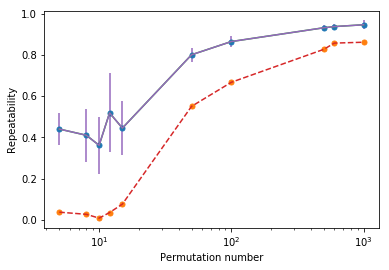

In [8]:
# Graph the dots in log scale (x in log, y in linear), because we increase x exponentially
plt.semilogx(x,y,'.',markersize=10)
plt.semilogx(x1,y1,'.',markersize=10)
plt.plot(x, y)
plt.plot(x1,y1, '--')
plt.errorbar(list(x),list(y),yerr=std_by_perm) # yerr is a list of standard deviations for each perm_num

plt.ylabel('Repeatability')
plt.xlabel('Permutation number')

#plt.savefig('foo.png')

In [9]:
#gp.gsea?